C:\Users\kenta\AppData\Local\Temp\ipykernel_4712\260263368.py:25: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  n_equilibrium = fsolve(equilibrium_condition, n_values[-1], args=(t, capacity, alpha))[0]


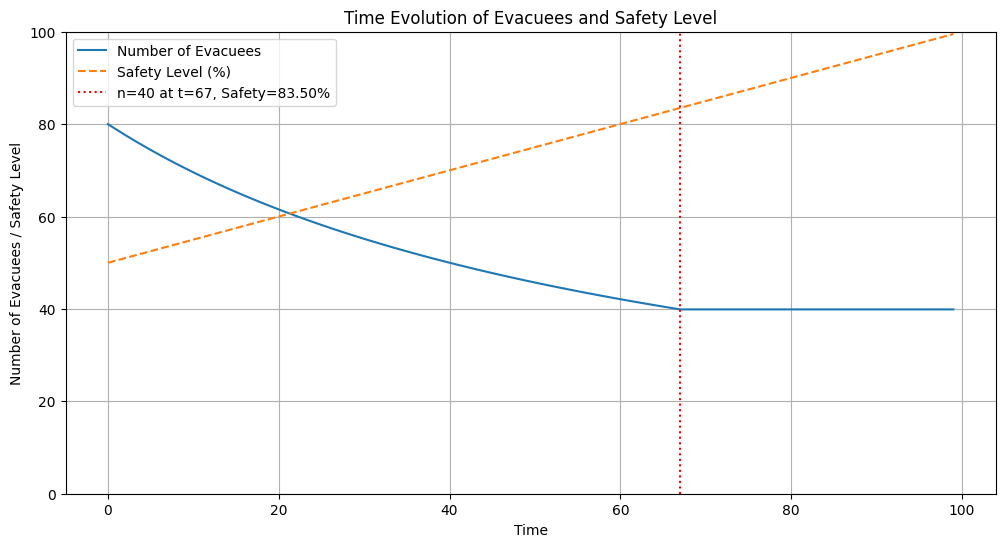

Initial number of evacuees: 80
Final number of evacuees: 39.90
Final safety level: 0.99
Period when n first reaches 40: 67
Safety level when n first reaches 40: 83.50%


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def calculate_safety(t, alpha):
    return min(0.5 + alpha * t, 1)

def calculate_utility(t, n, capacity, alpha):
    p = calculate_safety(t, alpha)
    EU_s = p * 20 + (1 - p) * (-10)
    EU_e = min(capacity / max(n, 1e-6), 1) * 15 + (1 - min(capacity / max(n, 1e-6), 1)) * (-5)
    return EU_s, EU_e

def equilibrium_condition(n, t, capacity, alpha):
    EU_s, EU_e = calculate_utility(t, n, capacity, alpha)
    return EU_s - EU_e

def simulate_over_time(T, initial_n, capacity, alpha):
    n_values = [initial_n]
    safety_values = [calculate_safety(0, alpha)]
    threshold_period = None
    threshold_safety = None
    
    for t in range(1, T):
        n_equilibrium = fsolve(equilibrium_condition, n_values[-1], args=(t, capacity, alpha))[0]
        n_new = max(min(n_equilibrium, 100), 0)  # Ensure n is between 0 and 100
        safety_new = calculate_safety(t, alpha)
        n_values.append(n_new)
        safety_values.append(safety_new)
        
        # n=40となる最初の期を記録
        if threshold_period is None and n_new <= 40:
            threshold_period = t
            threshold_safety = safety_new
    
    return n_values, safety_values, threshold_period, threshold_safety

T = 100  # Simulation period
initial_n = 80  # Initial number of evacuees
capacity = 40  # Capacity of temporary housing
alpha = 0.005  # Rate of increase in safety (decrease in radiation risk)

n_values, safety_values, threshold_period, threshold_safety = simulate_over_time(T, initial_n, capacity, alpha)

plt.figure(figsize=(12, 6))
plt.plot(range(T), n_values, label='Number of Evacuees')
plt.plot(range(T), [s * 100 for s in safety_values], label='Safety Level (%)', linestyle='--')
if threshold_period is not None:
    plt.axvline(x=threshold_period, color='r', linestyle=':', 
                label=f'n=40 at t={threshold_period}, Safety={threshold_safety*100:.2f}%')
plt.xlabel('Time')
plt.ylabel('Number of Evacuees / Safety Level')
plt.title('Time Evolution of Evacuees and Safety Level')
plt.ylim(0, 100)  # Set y-axis limits
plt.legend()
plt.grid(True)
plt.show()

# Print the initial and final number of evacuees
print(f"Initial number of evacuees: {n_values[0]}")
print(f"Final number of evacuees: {n_values[-1]:.2f}")
print(f"Final safety level: {safety_values[-1]:.2f}")
if threshold_period is not None:
    print(f"Period when n first reaches 40: {threshold_period}")
    print(f"Safety level when n first reaches 40: {threshold_safety*100:.2f}%")
else:
    print("n did not reach 40 during the simulation period")